In [19]:
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/refs/heads/master/exam-scores/exam-scores.csv')

In [20]:
df['Percentage'] = df['Percentage'].str.slice(0, -1)
df['Percentage'] = df['Percentage'].astype(float)
df['Student_Score'] = df['Student_Score'].astype(int)

In [21]:
df

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
0,M01,A,20,N,N,Y,24,80.0,B
1,M01,A,20,?,?,?,27,90.0,A-
2,M01,A,30,Y,Y,Y,30,100.0,A
3,M01,A,50,N,Y,Y,18,60.0,C-
4,M01,A,55,Y,Y,N,24,80.0,B
...,...,...,...,...,...,...,...,...,...
60,M02,D,40,?,?,?,23,76.7,B-
61,M02,D,45,Y,Y,N,22,73.3,C+
62,M02,D,45,?,?,?,24,80.0,B
63,M02,D,55,Y,Y,N,24,80.0,B


In [22]:
df_pivot = df.pivot_table(values=['Student_Score', 'Percentage'], index='Studied_In_Groups', aggfunc='median', columns='Made_Own_Study_Guide')

In [23]:
df_pivot_class_section = df.pivot_table(values=['Percentage','Made_Own_Study_Guide', 'Studied_In_Groups'], columns= 'Class_Section', index='Exam_Version', aggfunc={'Studied_In_Groups': 'size', 'Percentage': 'median', 'Made_Own_Study_Guide': 'size'})

In [24]:
df_pivot_class_section


Made_Own_Study_Guide     Percentage        Studied_In_Groups    
Class_Section                  M01 M02        M01    M02               M01 M02
Exam_Version                                                                  
A                                7  10       83.3  78.35                 7  10
B                                7   9       86.7  80.00                 7   9
C                                7   9       76.7  76.70                 7   9
D                                8   8       66.7  76.70                 8   8

# Dining Information

In [25]:
df_dining = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/refs/heads/master/dining/check-data.csv')
df_dining['date'] = pd.to_datetime(df_dining['date'])
df_dining['total amount of check'] = df_dining['total amount of check'].str.slice(1)
df_dining['gratuity'] = df_dining['gratuity'].str.slice(1)
df_dining['total amount of check'] = df_dining['total amount of check'].str.replace(',', '')



In [26]:
df_dining['total amount of check'] = df_dining['total amount of check'].astype(float)
df_dining['gratuity'] = df_dining['gratuity'].astype(float)

In [27]:
df_dining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   check                  50 non-null     int64         
 1   date                   50 non-null     datetime64[ns]
 2   party size             50 non-null     int64         
 3   total items on check   50 non-null     int64         
 4   total amount of check  50 non-null     float64       
 5   gratuity               50 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 2.5 KB


In [28]:
df_dining['day of the week'] = df_dining['date'].dt.strftime('%a')
df_dining['day of the week num'] = df_dining['date'].dt.day_of_week

In [29]:
df_dining_gratuity_over_time = df_dining.pivot_table(values=['gratuity', 'party size', 'total items on check'], 
                                                     index=['day of the week', 'day of the week num'], 
                                                     aggfunc='median')

In [30]:
df_dining_gratuity_over_time.reset_index(inplace=True)

In [31]:
df_dining_gratuity_over_time = df_dining_gratuity_over_time.set_index('day of the week num')

In [32]:
df_dining_gratuity_over_time = df_dining_gratuity_over_time.sort_index()

In [33]:
df_dining_gratuity_over_time = df_dining_gratuity_over_time.set_index('day of the week')

<Axes: xlabel='day of the week'>

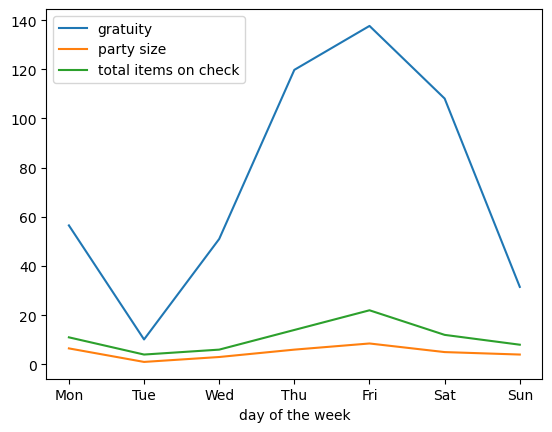

In [34]:
df_dining_gratuity_over_time.plot(kind='line')